In [1]:
from aqua import Reader

/work/bm1344/a270292/conda/envs/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [24]:
era_reader = Reader(model="ERA5", exp="era5", source="daily")
era_reader

In [3]:
reader = Reader(catalog="levante-eerie", model="IFS-FESOM", exp="eerie-fesom-historical-1950", source="3D_monthly_fesom_native")
reader

2025-10-07 16:20:51 :: Reader :: WARNING  -> FDB_HOME parameter is required but is missing, setting to default /work/bm1344/a270228/ifs-bundle-DE_CY48R1-icgen/source/eccodes
2025-10-07 16:20:52 :: Reader :: WARNING  -> Grid metadata is not defined. Trying to access the real data


AlignmentError: cannot reindex or align along dimension 'ncells' because of conflicting dimension sizes: {14741520, 7402886}

In [4]:
reader = Reader(catalog="levante-eerie", model="IFS-FESOM", exp="eerie-fesom-historical-1950", source="2D_daily_fesom_0.25deg")
reader

2025-10-07 16:23:56 :: Reader :: WARNING  -> FDB_HOME parameter is required but is missing, setting to default /work/bm1344/a270228/ifs-bundle-DE_CY48R1-icgen/source/eccodes


In [5]:
# Show the variables available in the reader

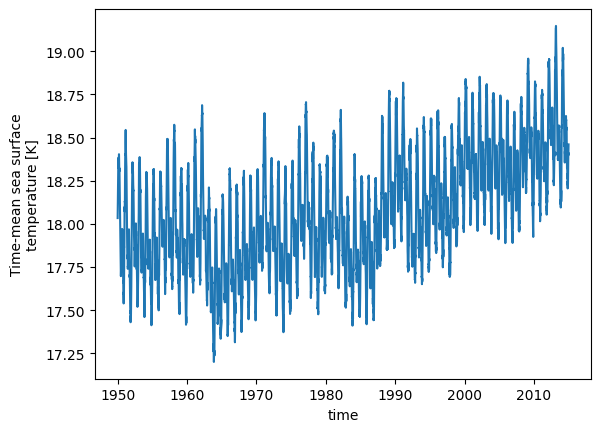

In [7]:
data['avg_tos'].isel(time=slice(0,23740)).aqua.fldmean().plot()

In [6]:
data = reader.retrieve()
data

2025-10-07 16:24:51 :: Fixer :: ERROR    -> Variable [] has no units!
2025-10-07 16:24:51 :: Fixer :: ERROR    -> Variable [] has no units!
2025-10-07 16:24:52 :: Reader :: WARNING  -> Variable lev_bnds has no units!
2025-10-07 16:24:52 :: Reader :: WARNING  -> Variable param1.2.10 has no units!
2025-10-07 16:24:52 :: Reader :: WARNING  -> Variable avg_sithick has no units!


<xarray.Dataset> Size: 1TB
Dimensions:        (time: 23741, lon: 1440, lat: 721, bnds: 2)
Coordinates:
  * time           (time) datetime64[ns] 190kB 1950-01-01 ... 2014-12-31
  * lon            (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * lat            (lat) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
Dimensions without coordinates: bnds
Data variables: (12/13)
    avg_mlotst030  (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    avg_mlotst125  (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    avg_siconc     (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    lev_bnds       (time, bnds) float64 380kB dask.array<chunksize=(365, 2), meta=np.ndarray>
    avg_sigrowth   (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    avg_sisnthick  (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ...             ...
    avg_sithick    (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    avg_siue       (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    avg_sivn       (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    avg_sos        (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    avg_tos        (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    avg_zos        (time, lat, lon) float32 99GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Mar 13 19:54:27 2025: cdo -z zstd -O -f nc4 mergetime /...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [25]:
era5_data = era_reader.retrieve()
era5_data

ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
2025-10-07 17:23:18 :: Reader :: WARNING  -> Variable time_bnds has no units!


<xarray.Dataset> Size: 126GB
Dimensions:    (time: 30316, bnds: 2, lon: 1440, lat: 721)
Coordinates:
  * time       (time) datetime64[ns] 243kB 1940-01-01T15:00:00 ... 2022-12-31...
  * lon        (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat        (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 485kB dask.array<chunksize=(30, 2), meta=np.ndarray>
    tnlwrf     (time, lat, lon) float32 126GB dask.array<chunksize=(30, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Sat Nov 18 14:40:07 2023: cdo -O -s -f nc4 -z zip -daymean ...
    frequency:    day
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

<regionmask.Regions 'AR6 reference regions (land only)'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
 0 GIC Greenland/Iceland
 1 NWN N.W.North-America
 2 NEN N.E.North-America
 3 WNA   W.North-America
 4 CNA   C.North-America
..  ..               ...
41 EAU       E.Australia
42 SAU       S.Australia
43  NZ       New-Zealand
44 EAN      E.Antarctica
45 WAN      W.Antarctica

[46 regions]


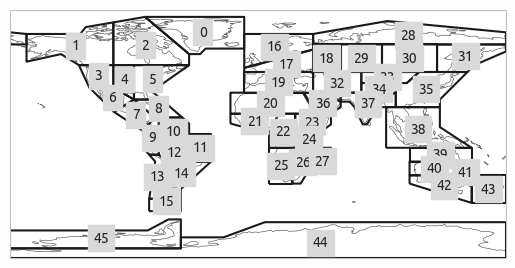

In [35]:
import regionmask
import matplotlib.pyplot as plt

# Load AR6 reference regions (land-only)
ar6_land = regionmask.defined_regions.ar6.land

# Show list of region names
print(ar6_land)

# Plot them on a map
ar6_land.plot()
plt.show()

<regionmask.Regions 'AR6 reference regions'>
Source:   Iturbide et al., 2020 (ESSD)
overlap:  False

Regions:
 0 GIC      Greenland/Iceland
 1 NWN      N.W.North-America
 2 NEN      N.E.North-America
 3 WNA        W.North-America
 4 CNA        C.North-America
..  ..                    ...
53 ARS            Arabian-Sea
54 BOB          Bay-of-Bengal
55 EIO Equatorial.Indic-Ocean
56 SIO          S.Indic-Ocean
57 SOO         Southern-Ocean

[58 regions]


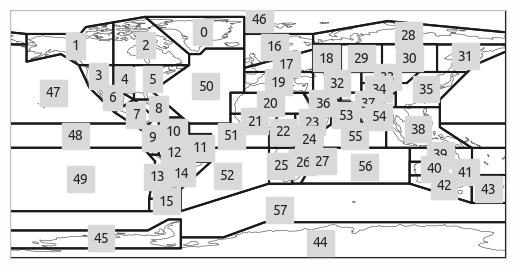

In [36]:
# Load AR6 reference regions (land-only)
ar6_all = regionmask.defined_regions.ar6.all

# Show list of region names
print(ar6_all)

# Plot them on a map
ar6_all.plot()
plt.show()

In [26]:
tnlwrf = era5_data['tnlwrf'].isel(time=0)

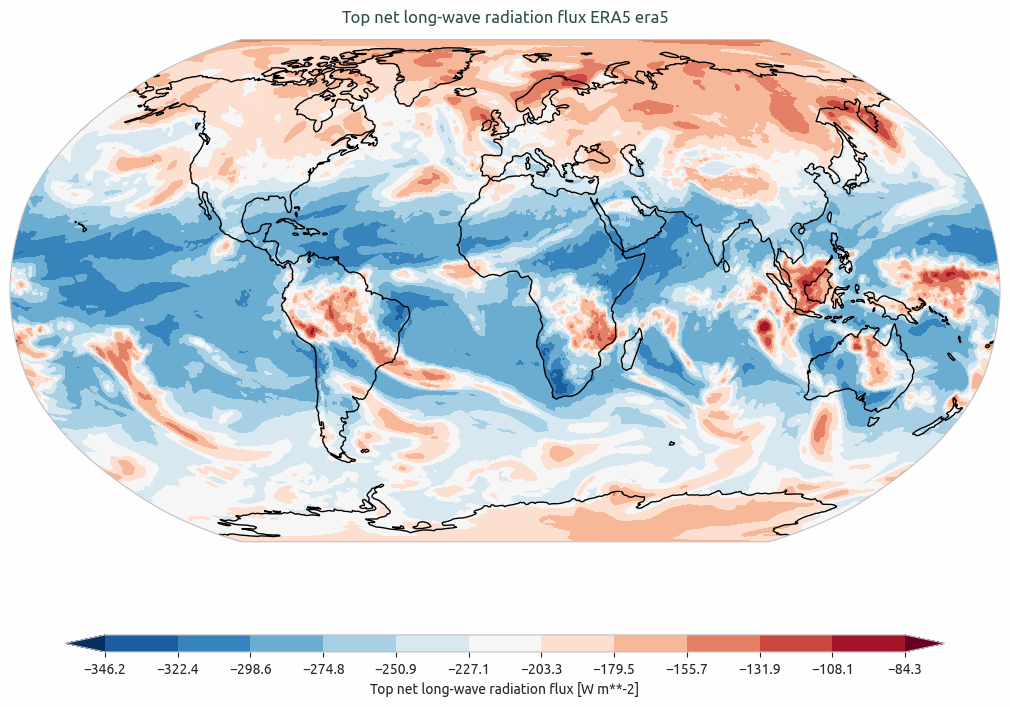

In [27]:
tnlwrf.aqua.plot_single_map()

In [37]:
mask_2D = ar6_all.mask(tnlwrf)

In [17]:
from aqua import Reader, plot_single_map

2025-10-07 17:29:12 :: cbar get label :: WARNING  -> No colorbar label found, please specify one with the cbar_label argument.
2025-10-07 17:29:12 :: set map title :: WARNING  -> No title found, please specify one with the title argument.


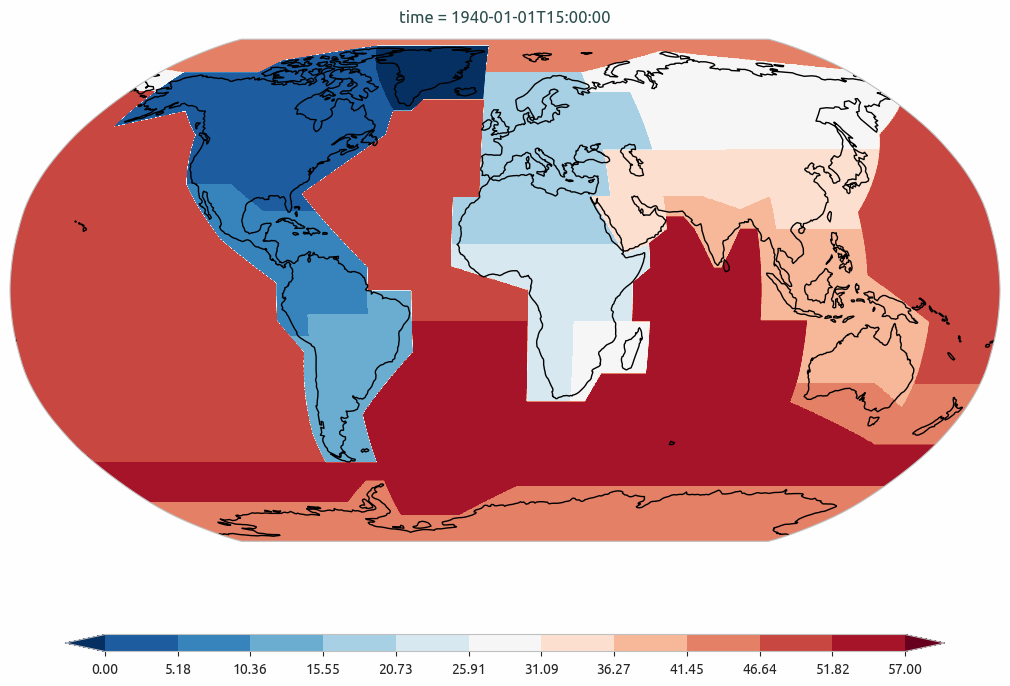

In [38]:
plot_single_map(mask_2D)

In [39]:
mask_2D = ar6_all.mask(tnlwrf)

In [40]:
mask_3D = ar6_all.mask_3D(tnlwrf)
mask_3D

<xarray.DataArray 'mask' (region: 58, lat: 721, lon: 1440)> Size: 60MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]],
      shape=(58, 721, 1440))
Coordinates:
    time     datetime64[ns] 8B 1940-01-01T15:00:00
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * region   (region) int64 464B 0 1 2 3 4 5 6 7 8 ... 50 51 52 53 54 55 56 57
    abbrevs  (region) <U4 928B 'GIC' 'NWN' 'NEN' 'WNA' ... 'EIO' 'SIO' 'SOO'
    names    (region) <U25 6kB 'Greenland/Iceland' ... 'Southern-Ocean'
Attributes:
    standard_name:  region

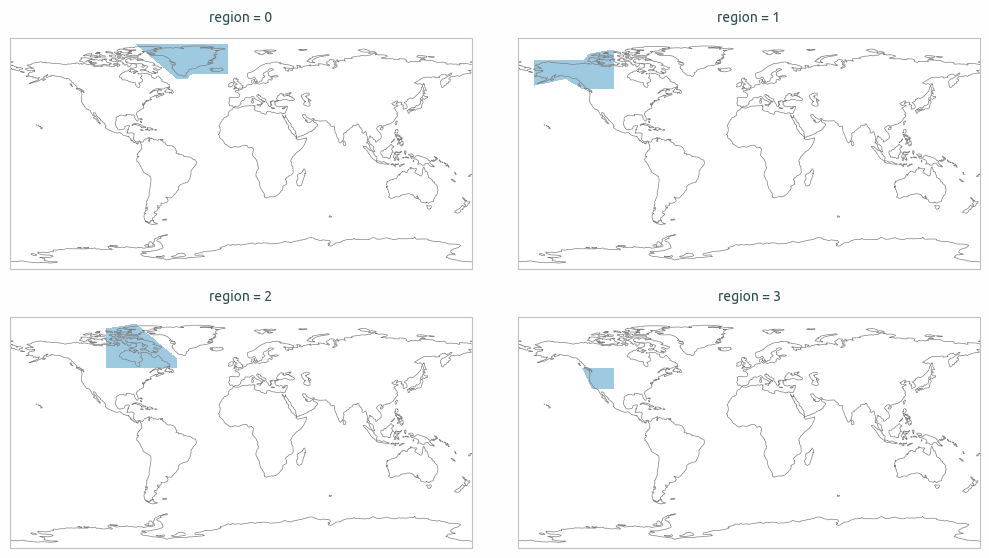

In [41]:
from matplotlib import colors as mplc

cmap1 = mplc.ListedColormap(["none", "#9ecae1"])

fg = mask_3D.isel(region=slice(4)).plot(
    subplot_kws=dict(projection=ccrs.PlateCarree()),
    col="region",
    col_wrap=2,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    aspect=1.5,
    cmap=cmap1,
)

for ax in fg.axes.flatten():
    ax.coastlines(lw=0.5, color="0.5")

fg.fig.subplots_adjust(hspace=0, wspace=0.1);

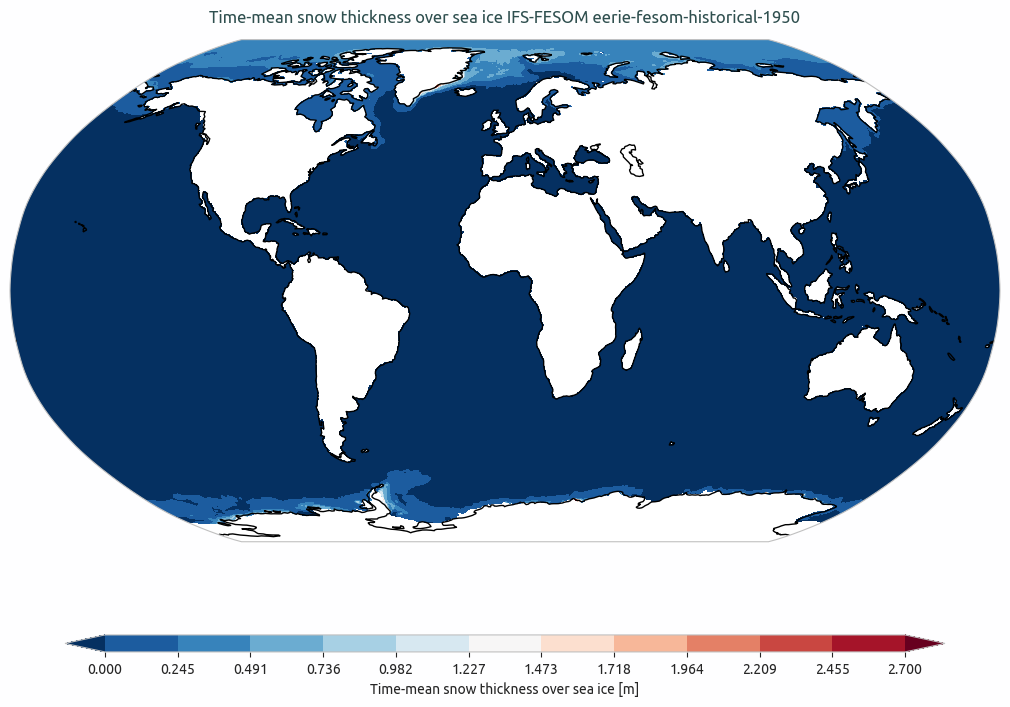

In [14]:
sisnthick.aqua.plot_single_map()

In [ ]:

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

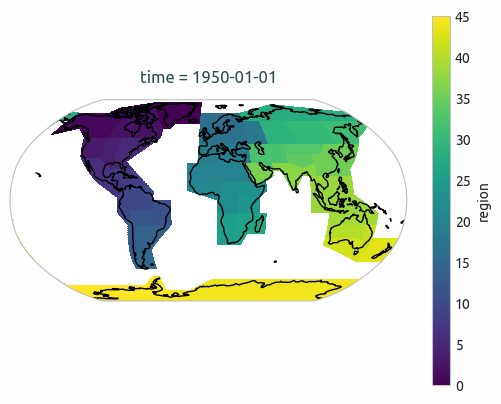

In [15]:
proj = ccrs.Robinson()
f, ax = plt.subplots(subplot_kw=dict(projection=proj))

h = mask_2D.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines()

ar6_land.plot_regions(line_kws=dict(lw=0.5), add_label=False);

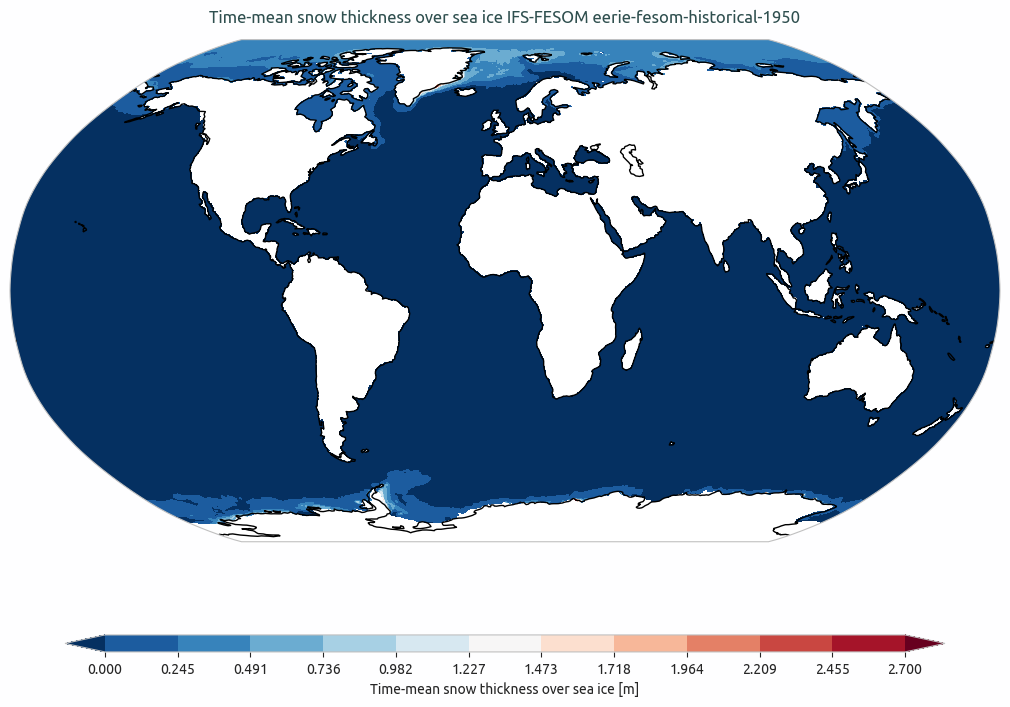

In [13]:
data['avg_sisnthick'].isel(time=0).aqua.plot_single_map()

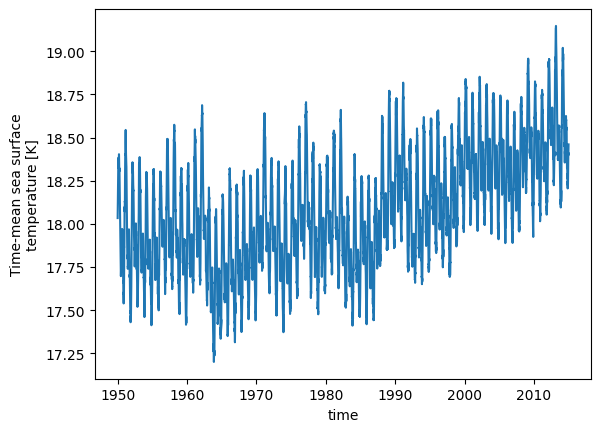

In [8]:
data['avg_tos'].isel(time=slice(0,23740)).aqua.fldmean().plot()

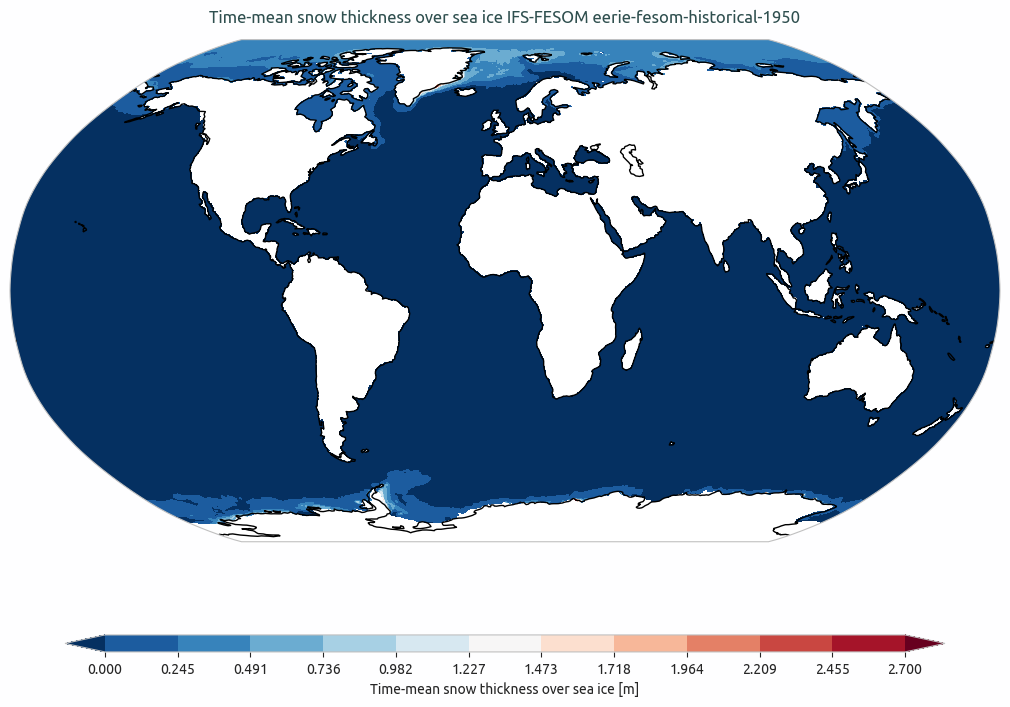

In [15]:
data['avg_sisnthick'].isel(time=0).aqua.plot_single_map()

2025-10-01 04:45:07 :: cbar get label :: WARNING  -> No colorbar label found, please specify one with the cbar_label argument.


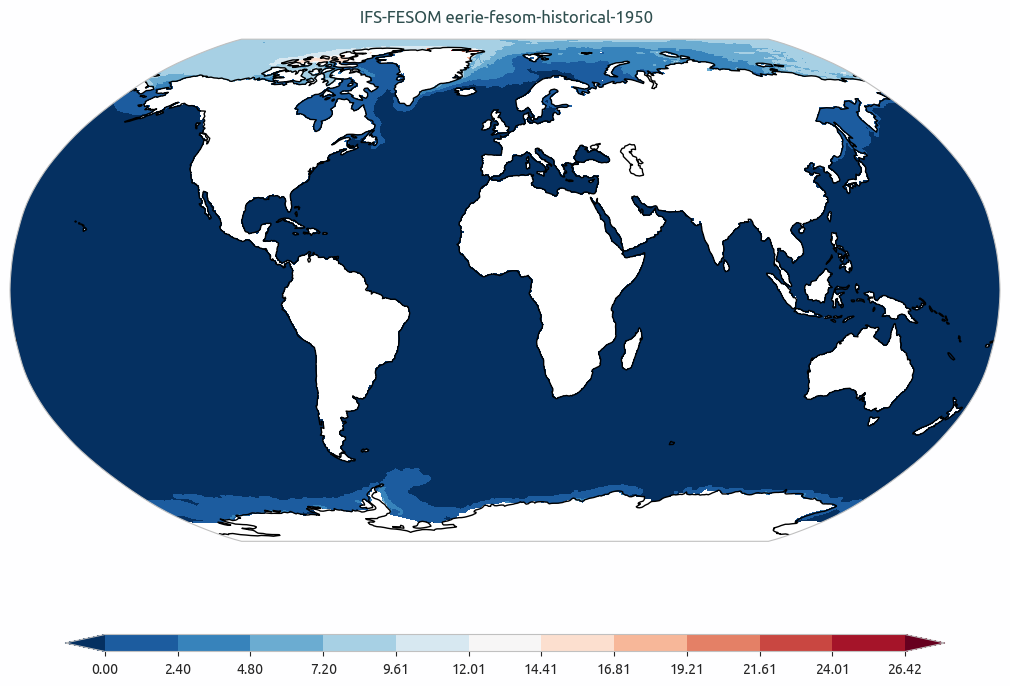

In [16]:
data['param1.2.10'].isel(time=0).aqua.plot_single_map()

2025-10-01 04:45:24 :: plot_single_map :: ERROR    -> Cannot plot contourf: lower_level and upper_level cannot be NaN
2025-10-01 04:45:24 :: plot_single_map :: WARNING  -> Trying with transform_first=True


ValueError: The X and Y arguments must be gridded 2-dimensional arrays

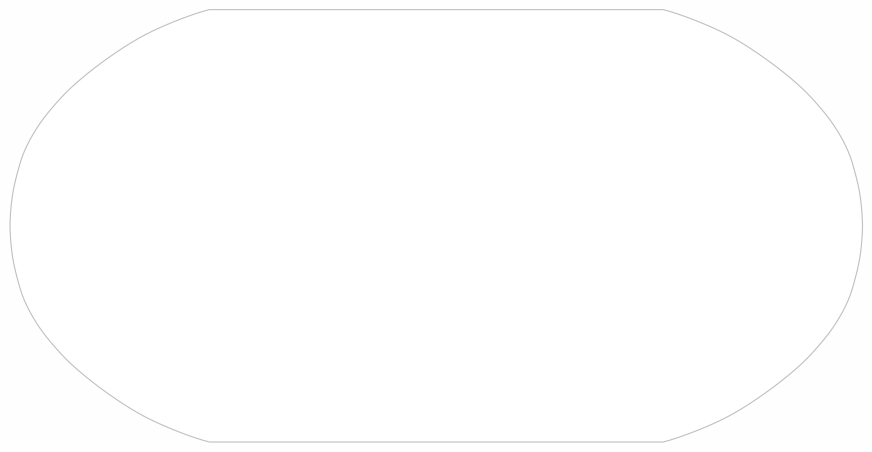

In [17]:
data['avg_sithick'].isel(time=0).aqua.plot_single_map()

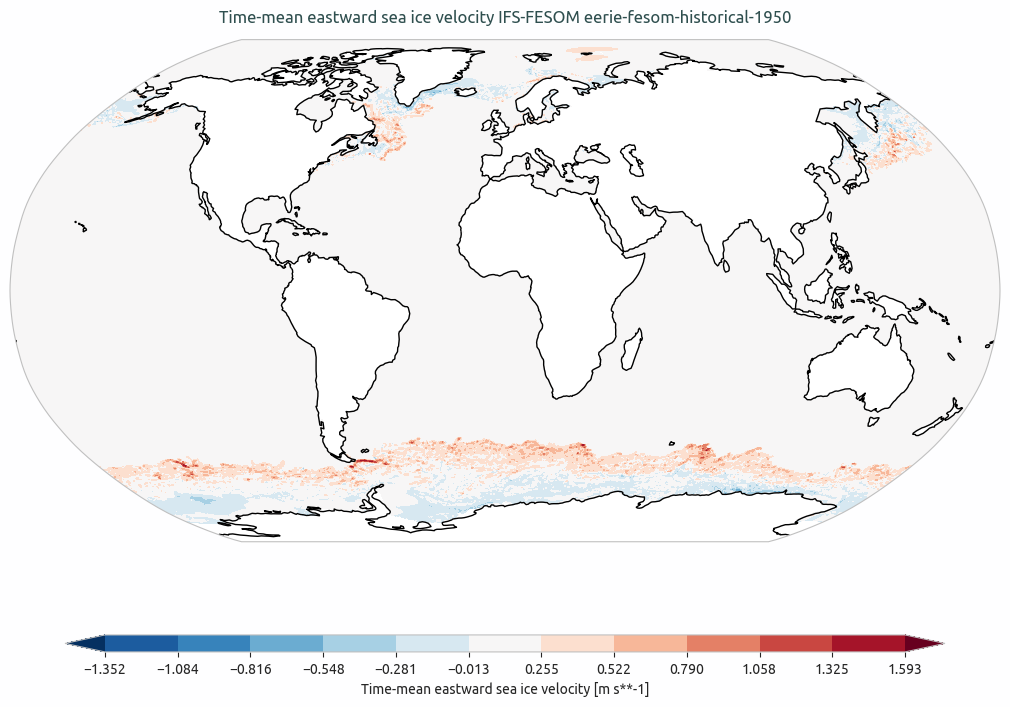

In [18]:
data['avg_siue'].isel(time=0).aqua.plot_single_map()

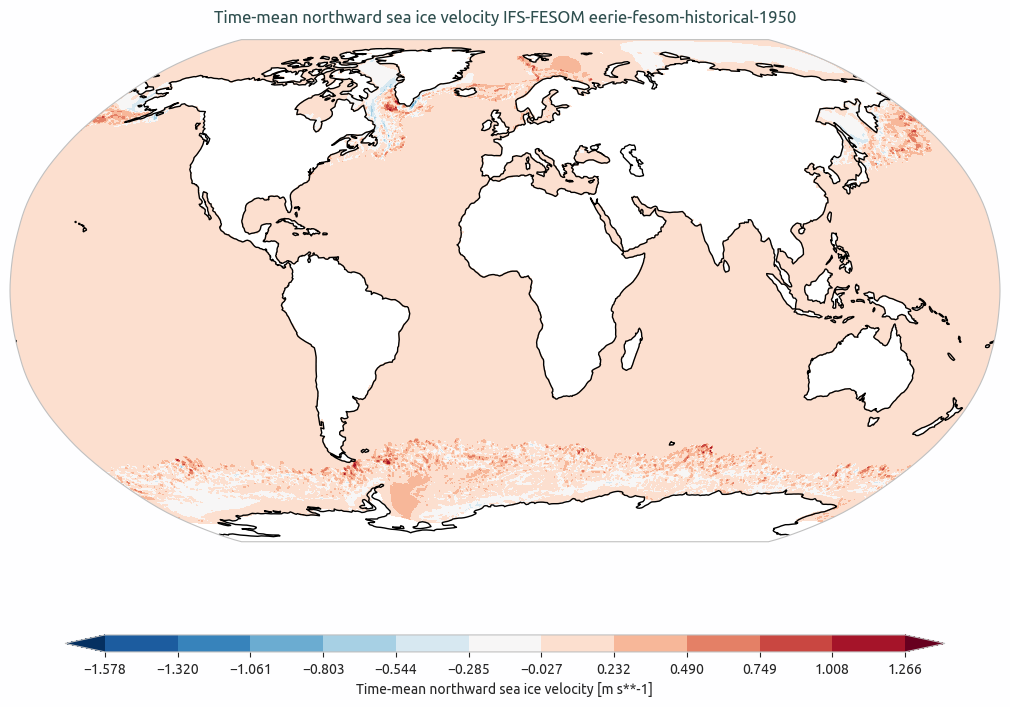

In [19]:
data['avg_sivn'].isel(time=0).aqua.plot_single_map()

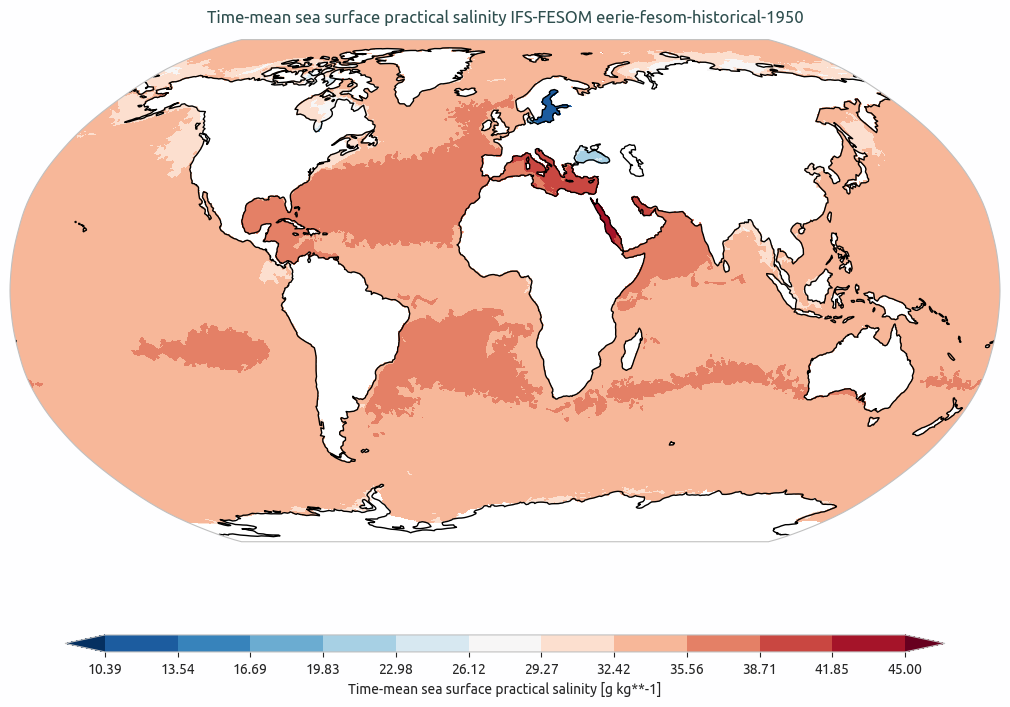

In [20]:
data['avg_sos'].isel(time=0).aqua.plot_single_map()

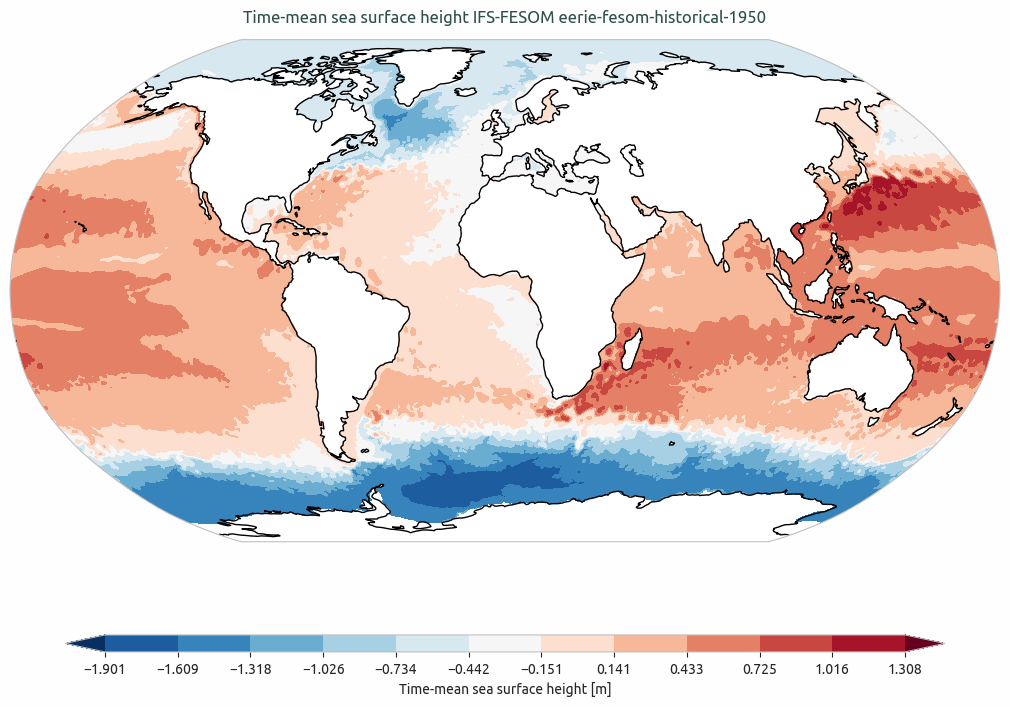

In [21]:
data['avg_zos'].isel(time=0).aqua.plot_single_map()

2025-10-01 04:42:03 :: plot_single_map :: ERROR    -> Cannot plot contourf: lower_level and upper_level cannot be NaN
2025-10-01 04:42:03 :: plot_single_map :: WARNING  -> Trying with transform_first=True


ValueError: The X and Y arguments must be gridded 2-dimensional arrays

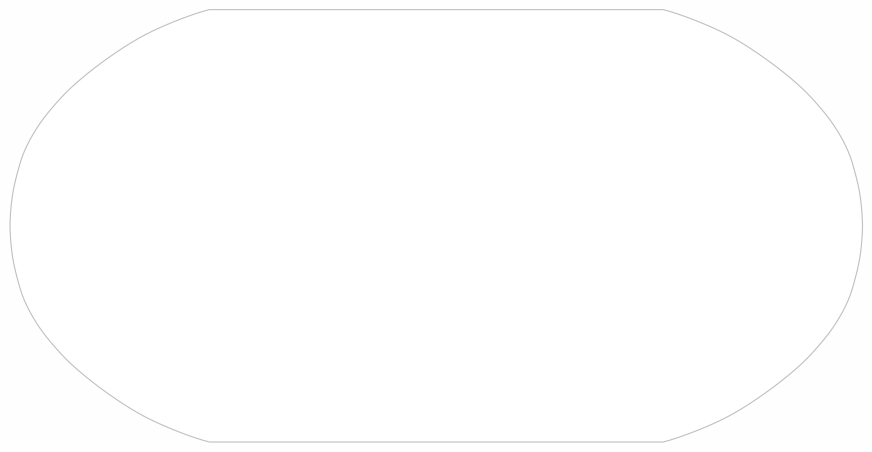

In [10]:
data['avg_mlotst030'].isel(time=0).aqua.plot_single_map()

2025-10-01 04:43:48 :: plot_single_map :: ERROR    -> Cannot plot contourf: lower_level and upper_level cannot be NaN
2025-10-01 04:43:48 :: plot_single_map :: WARNING  -> Trying with transform_first=True


ValueError: The X and Y arguments must be gridded 2-dimensional arrays

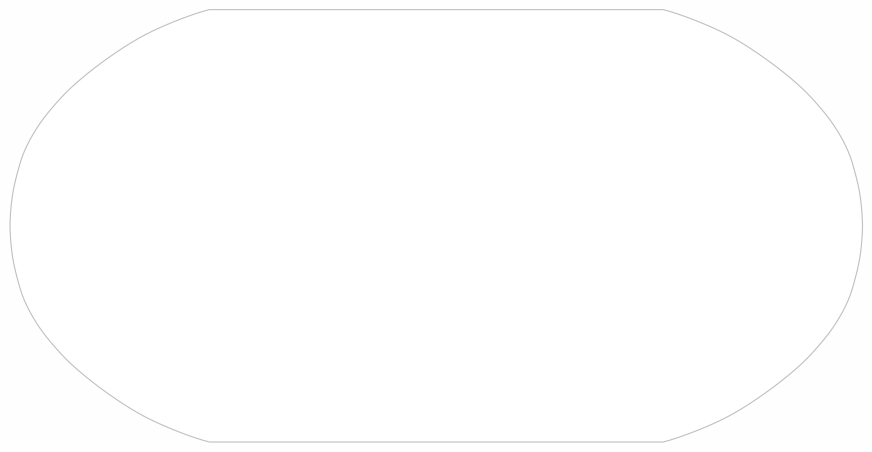

In [14]:
data['avg_sigrowth'].isel(time=0).aqua.plot_single_map()

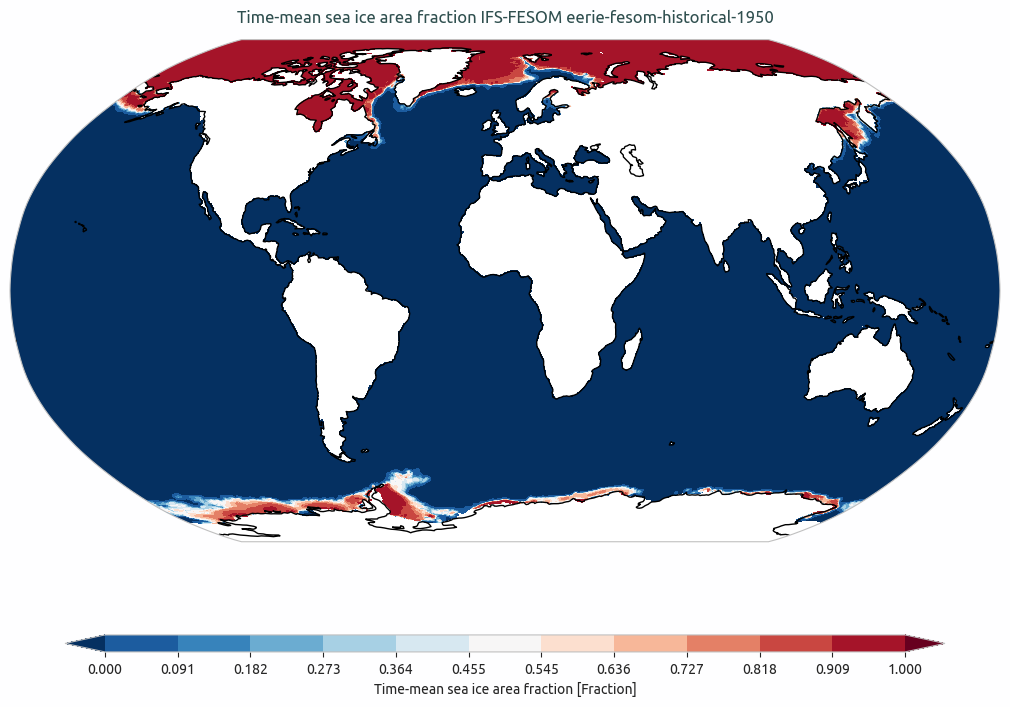

In [13]:
data['avg_siconc'].isel(time=0).aqua.plot_single_map()

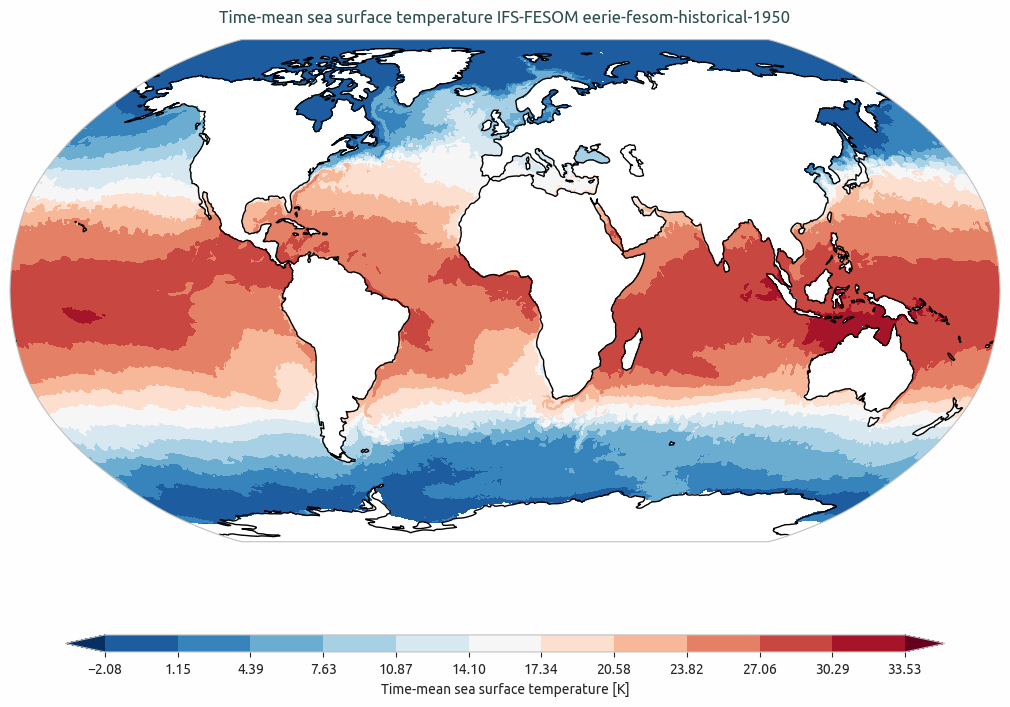

In [11]:
data['avg_tos'].isel(time=0).aqua.plot_single_map()

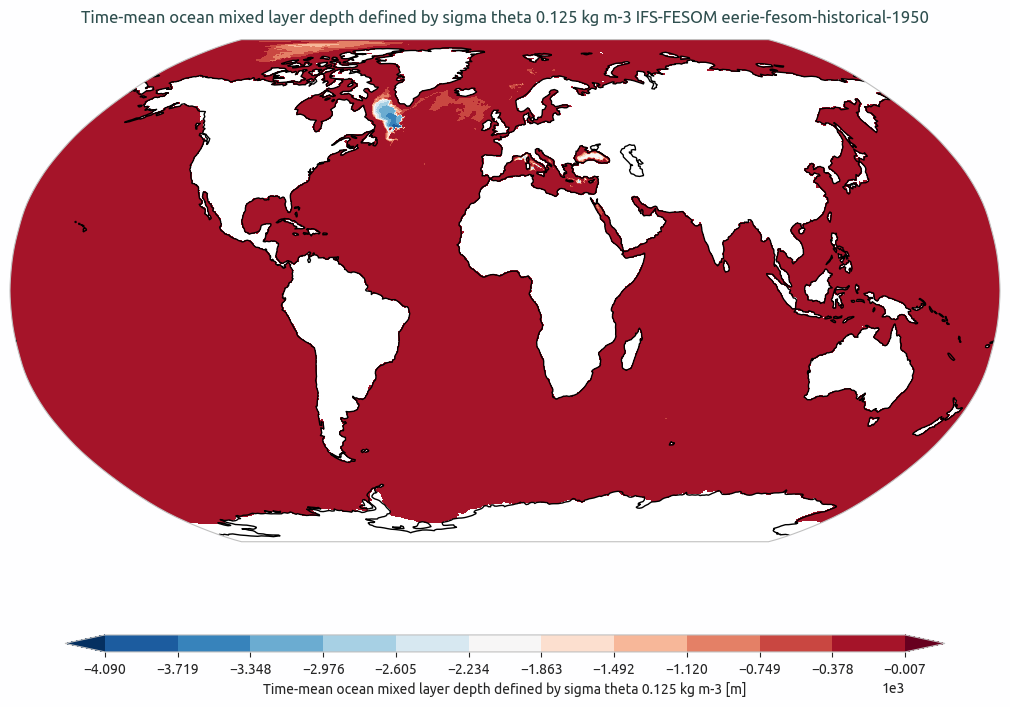

In [12]:
data['avg_mlotst125'].isel(time=0).aqua.plot_single_map()